In [1]:
import numpy as np
import pandas as pd
import itertools

import warnings
warnings.filterwarnings("ignore")

# Splitting
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import confusion_matrix, f1_score

# Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from keras.models import Sequential
from keras.layers import Dense, Dropout

from collections import Counter

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(12, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def get_naive_predictions(y_train, y_test):
    c = Counter(y_train)
    most_common = c.most_common()[0][0]
    predictions = [most_common]*len(y_test)
    
    cnf_matrix = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')
    
    print("Naive F1 score on the test set: {}".format(f1_score(y_test, predictions, average="weighted")))

In [4]:
def get_logreg_results(X_train, X_test, y_train, y_test):
    clf = LogisticRegression()
    skf = StratifiedKFold(n_splits=5)
    
    scores = []
    f = 0
    for train_index, test_index in skf.split(X_train, y_train):
        X_tr, X_t = X_train[train_index], X_train[test_index]
        y_tr, y_t = y_train[train_index], y_train[test_index]
        
        clf.fit(X_tr, y_tr)
        predictions = clf.predict(X_test)
        scores.append(f1_score(y_test, predictions, average="micro"))
        print("Fold {}: {}".format(f+1, scores[-1]))
        f+=1
    print("Logistic cross-validation F1 score: {}".format(np.mean(scores)))
    
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    cnf_matrix = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix for Logistic Regression')
    
    print("Logistic F1 score on the test set: {}".format(f1_score(y_test, predictions, average="weighted")))

In [5]:
def get_svm_results(X_train, X_test, y_train, y_test):
    clf = SVC(kernel='linear')
    skf = StratifiedKFold(n_splits=5)
    
    scores = []
    f = 0
    for train_index, test_index in skf.split(X_train, y_train):
        X_tr, X_t = X_train[train_index], X_train[test_index]
        y_tr, y_t = y_train[train_index], y_train[test_index]
        
        clf.fit(X_tr, y_tr)
        predictions = clf.predict(X_test)
        scores.append(f1_score(y_test, predictions, average="micro"))
        print("Fold {}: {}".format(f+1, scores[-1]))
        f+=1
    print("SVM cross-validation F1 score: {}".format(np.mean(scores)))
    
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    cnf_matrix = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix for SVM')
    
    print("SVM F1 score on the test set: {}".format(f1_score(y_test, predictions, average="weighted")))

In [6]:
def get_rf_results(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier()
    skf = StratifiedKFold(n_splits=5)
    
    scores = []
    f = 0
    for train_index, test_index in skf.split(X_train, y_train):
        X_tr, X_t = X_train[train_index], X_train[test_index]
        y_tr, y_t = y_train[train_index], y_train[test_index]
        
        clf.fit(X_tr, y_tr)
        predictions = clf.predict(X_test)
        scores.append(f1_score(y_test, predictions, average="micro"))
        print("Fold {}: {}".format(f+1, scores[-1]))
        f+=1
    print("Random Forest cross-validation F1 score: {}".format(np.mean(scores)))
    
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    cnf_matrix = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix for SVM')
    
    print("Random Forest F1 score on the test set: {}".format(f1_score(y_test, predictions, average="weighted")))

In [25]:
features = "tfidf" # bow or tfidf or doc2vec
description = True

In [26]:
print("Reading {} dataset".format(features))
if description:
    df_train = pd.read_csv("data/{}_train_description.csv".format(features))
    df_test = pd.read_csv("data/{}_test_description.csv".format(features))
else:
    df_train = pd.read_csv("data/{}_train.csv".format(features))
    df_test = pd.read_csv("data/{}_test.csv".format(features))

Reading tfidf dataset


In [27]:
len(df_test)

370

In [28]:
X_train = df_train.drop(["label"], axis=1).as_matrix()
X_test = df_test.drop(["label"], axis=1).as_matrix()

y_train = df_train["label"].as_matrix()
y_test = df_test["label"].as_matrix()

In [35]:
df_train['label'].unique()

array([10,  7,  8,  9, 23, 11, 24, 22,  3,  1, 21, 25,  2, 26])

In [29]:
class_names = ['Beautiful', 'Courageous', 'Funny', 
               'Informative', 'Ingenious', 'Inspiring', 'Longwinded', 
               'Unconvincing', 'Fascinating', 'Jaw-dropping', 
               'Persuasive', 'OK', 'Obnoxious']

Confusion matrix, without normalization
Naive F1 score on the test set: 0.1730165649520488


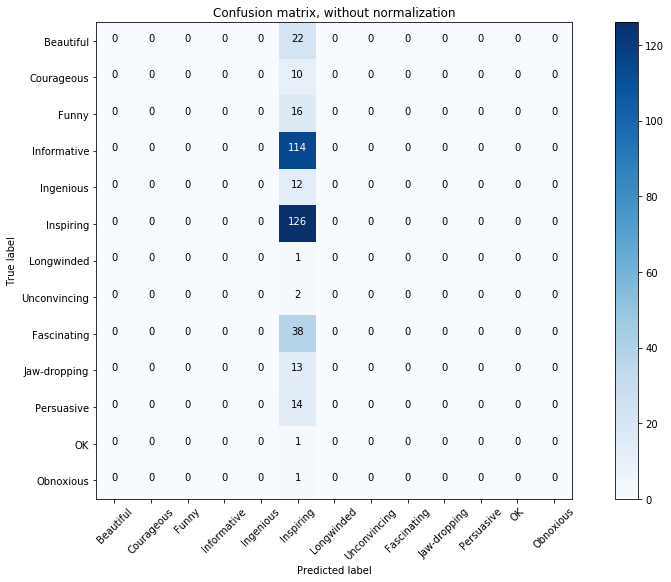

In [30]:
get_naive_predictions(y_train, y_test)

Fold 1: 0.5
Fold 2: 0.4891891891891892
Fold 3: 0.5108108108108108
Fold 4: 0.5243243243243243
Fold 5: 0.5054054054054054
Logistic cross-validation F1 score: 0.5059459459459459
Confusion matrix, without normalization
Logistic F1 score on the test set: 0.41518422473646355


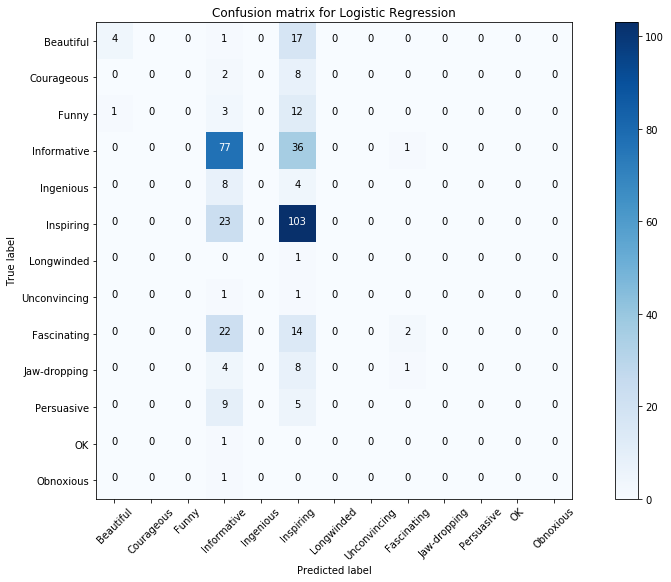

In [31]:
get_logreg_results(X_train, X_test, y_train, y_test)

Fold 1: 0.5243243243243243
Fold 2: 0.5162162162162162
Fold 3: 0.5027027027027027
Fold 4: 0.5459459459459459
Fold 5: 0.5081081081081081
SVM cross-validation F1 score: 0.5194594594594595
Confusion matrix, without normalization
SVM F1 score on the test set: 0.4492743954249813


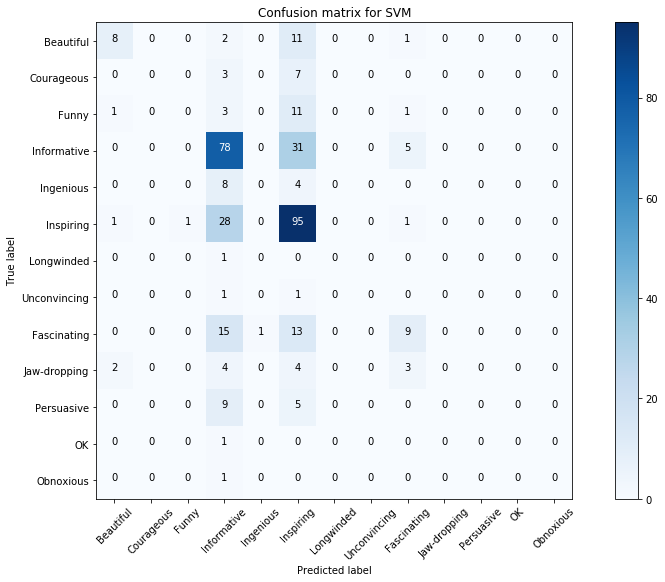

In [32]:
get_svm_results(X_train, X_test, y_train, y_test)

Fold 1: 0.43513513513513513
Fold 2: 0.4513513513513514
Fold 3: 0.45675675675675675
Fold 4: 0.46756756756756757
Fold 5: 0.4891891891891892
Random Forest cross-validation F1 score: 0.4600000000000001
Confusion matrix, without normalization
Random Forest F1 score on the test set: 0.39647564659584206


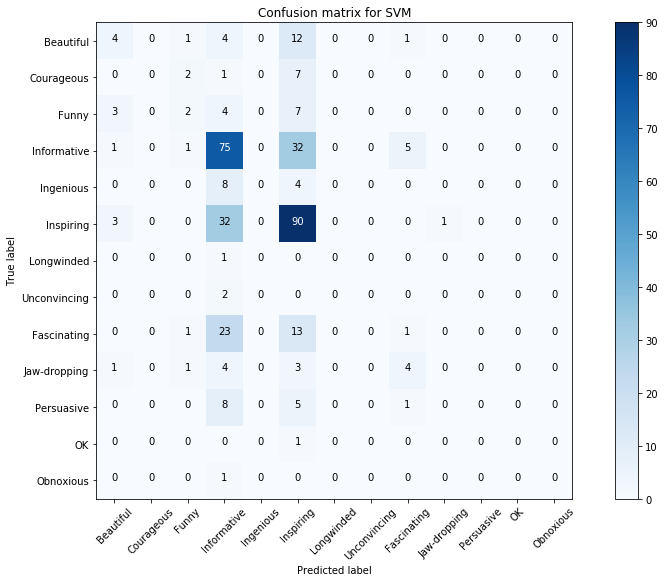

In [33]:
get_rf_results(X_train, X_test, y_train, y_test)